In [88]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [90]:
len(X_train)

60000

In [91]:
len(X_test)

10000

In [92]:
X_train[0].shape 

(28, 28)

In [93]:
X_train[0] #needs to flattend

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [94]:
X_train=X_train/255
X_test=X_test/255

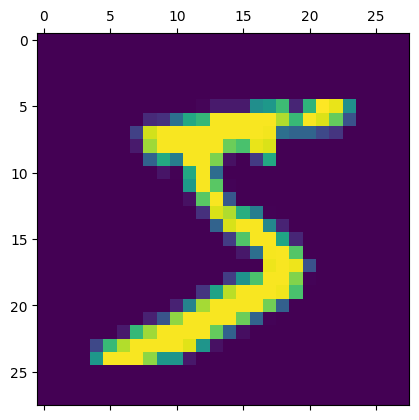

In [95]:
plt.matshow(X_train[0])   # visualize as image
plt.show()

In [106]:
model = keras.Sequential([
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(((28*28)//2),input_shape=(28*28),activation='gelu'),
    keras.layers.Dense(100,activation='gelu'),
    keras.layers.Dense(10,activation='softmax')       
])

In [107]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
    )

In [108]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9328 - loss: 0.2223
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9689 - loss: 0.0999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9763 - loss: 0.0734
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0591
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9833 - loss: 0.0498
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9858 - loss: 0.0427
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0392
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9887 - loss: 0.0351
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9896 - loss: 0.0316
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9891 - loss: 0.0312


In [109]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.9823 - loss: 0.0702


[0.07017714530229568, 0.9822999835014343]

In [110]:
import numpy as np
y_predicted=model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


Text(0.5, 47.7222222222222, 'Predicted')

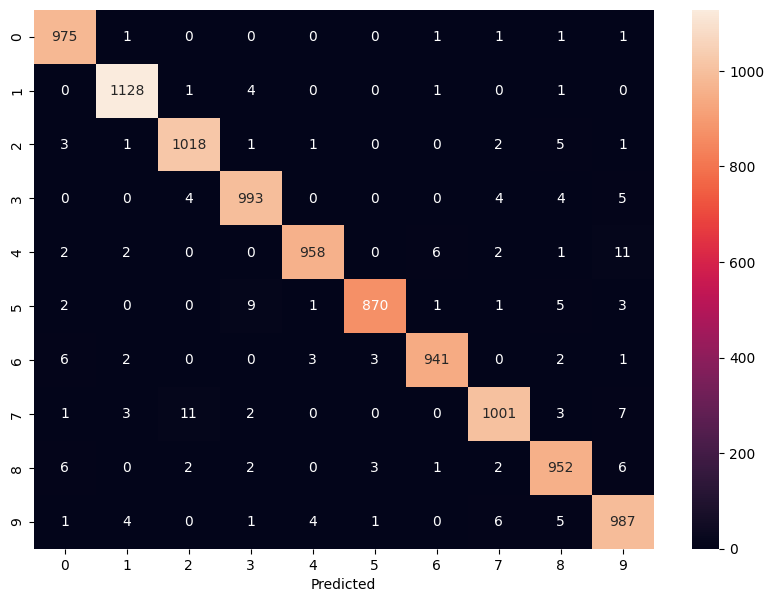

In [111]:
import seaborn as sns
plt.figure(figsize=(10,7))   
sns.heatmap(cm, annot=True, fmt='d')  # annot=True to show numbers, fmt='d' for integers
plt.xlabel("Predicted")